# Implementing Neural Nets with Numpy 

In [13]:
import numpy as np
import matplotlib.pyplot as plt

As with any NN, we need to define 
1. N, batch size (how many data points we batch together to feed into the network for each training iteration)
2. D_in

In [2]:
N, D_in, H, D_out = 64, 1000, 100, 10
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)
learning_rate = 1e-6

In [3]:
def forward(x, w1, w2):
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    return h,h_relu,y_pred 

def backprop(y_pred,y,w2,x):
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    return grad_w1,grad_w2

def update_weights(learning_rate, wts, grads):
    wts = [wts[i] - learning_rate * grads[i] for i in range(len(grads))]
    return wts

In [4]:
losses = []
for t in range(500):
    # Forward pass: compute predicted y
    h,h_relu,y_pred = forward(x, w1, w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    losses.append(loss)
    if t%10 == 0:
        print(t,loss)
    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_w1, grad_w2 = backprop(y_pred, y, w2, x)

    # Update weights
    newwts = update_weights(learning_rate, [w1,w2],[grad_w1,grad_w2])
    w1 = newwts[0]
    w2 = newwts[1]

0 25821717.79594508
10 2990815.177038224
20 227958.96683542518
30 72527.36720239455
40 27961.29320001861
50 11880.112144158691
60 5380.362705199739
70 2545.897482907582
80 1245.3431924239312
90 624.9581993955965
100 320.2348613321201
110 167.33291976395515
120 88.8152181174022
130 47.7252230712143
140 25.920790522282537
150 14.209109787031826
160 7.8520446822132195
170 4.369968528844953
180 2.447307484721206
190 1.3781972657884225
200 0.7799313257244906
210 0.44332902648636324
220 0.2529947194111715
230 0.14488079533582207
240 0.08323144775276493
250 0.04795127498920168
260 0.02769625436983872
270 0.016033158612897818
280 0.009300558287029442
290 0.005405152812189648
300 0.0031464521613622314
310 0.001834383675435549
320 0.0010708575092865313
330 0.0006259054870571197
340 0.00036623321506733025
350 0.00021451211607372085
360 0.0001257545364392423
370 7.378339550583401e-05
380 4.332232927972118e-05
390 2.5453728709243733e-05
400 1.4964762563234315e-05
410 8.802640699564468e-06
420 5.180

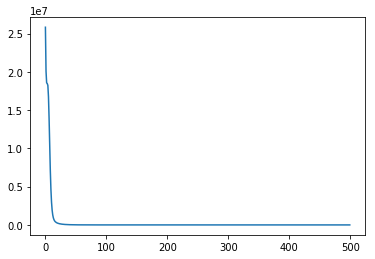

In [5]:
plt.plot(losses)

# Implementing Neural Nets with PyTorch Tensor

In [6]:
import torch 
dtype = torch.float
device = torch.device("cpu")
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

In [7]:
def forward(x, w1, w2):
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)
    return h,h_relu,y_pred 

def backprop(y_pred,y,w2,x):
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)
    return grad_w1,grad_w2

def update_weights(learning_rate, wts, grads):
    wts = [wts[i] - learning_rate * grads[i] for i in range(len(grads))]
    return wts

In [8]:
losses = []
for t in range(500):
    # Forward pass: compute predicted y
    h,h_relu,y_pred = forward(x, w1, w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    losses.append(loss)
    if t%10 == 0:
        print(t,loss)
    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_w1, grad_w2 = backprop(y_pred, y, w2, x)

    # Update weights
    newwts = update_weights(learning_rate, [w1,w2],[grad_w1,grad_w2])
    w1 = newwts[0]
    w2 = newwts[1]

0 tensor(2.6598e+07)
10 tensor(1.00000e+06 *
       2.8419)
20 tensor(1.00000e+05 *
       2.2178)
30 tensor(67892.1172)
40 tensor(26809.6094)
50 tensor(11988.1670)
60 tensor(5802.9707)
70 tensor(2969.6003)
80 tensor(1582.7921)
90 tensor(868.9327)
100 tensor(488.3370)
110 tensor(279.6025)
120 tensor(162.5007)
130 tensor(95.5657)
140 tensor(56.7578)
150 tensor(33.9919)
160 tensor(20.5045)
170 tensor(12.4466)
180 tensor(7.5963)
190 tensor(4.6592)
200 tensor(2.8702)
210 tensor(1.7752)
220 tensor(1.1018)
230 tensor(0.6862)
240 tensor(0.4287)
250 tensor(0.2685)
260 tensor(0.1686)
270 tensor(0.1062)
280 tensor(1.00000e-02 *
       6.7001)
290 tensor(1.00000e-02 *
       4.2414)
300 tensor(1.00000e-02 *
       2.6917)
310 tensor(1.00000e-02 *
       1.7159)
320 tensor(1.00000e-02 *
       1.1007)
330 tensor(1.00000e-03 *
       7.1183)
340 tensor(1.00000e-03 *
       4.6564)
350 tensor(1.00000e-03 *
       3.0992)
360 tensor(1.00000e-03 *
       2.0996)
370 tensor(1.00000e-03 *
       1.4569)

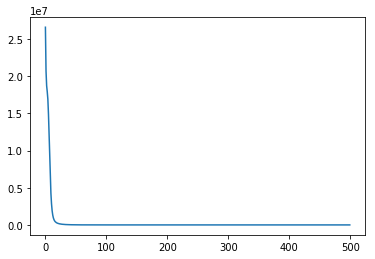

In [9]:
plt.plot(losses)

# PyTorch AutoGrad

In [10]:
# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

In [11]:
learning_rate = 1e-6
losses = []
for t in range(500):
    # Forward pass: we chain operations on x by using the . notation 
    # consecutively, kind of like Scala
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    # Compute and print loss using operations on Tensors..
    loss = (y_pred - y).pow(2).sum()
    losses.append(loss)
    if t%10 == 0:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This is dependent on setting 
    # grad_required to True in the weights variables. This is really cool; this
    # means PyTorch tensors inherently can be configureed to be "differentiable"
    # when needed. 
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    # An alternative way is to operate on weight.data and weight.grad.data.
    # Recall that tensor.data gives a tensor that shares the storage with
    # tensor, but doesn't track history.
    # You can also use torch.optim.SGD to achieve this.
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()

0 25068882.0
10 3745939.5
20 240470.25
30 70466.6484375
40 25393.7109375
50 10225.412109375
60 4459.32763671875
70 2063.578857421875
80 999.1996459960938
90 502.0657043457031
100 259.773681640625
110 137.65313720703125
120 74.42430114746094
130 40.928688049316406
140 22.82491111755371
150 12.881582260131836
160 7.3401312828063965
170 4.220149040222168
180 2.445673942565918
190 1.4271118640899658
200 0.8378154635429382
210 0.4944673180580139
220 0.2932897210121155
230 0.17464874684810638
240 0.10441382974386215
250 0.06264550238847733
260 0.03774808719754219
270 0.022828422486782074
280 0.01386481523513794
290 0.008492876775562763
300 0.005264201667159796
310 0.003316552611067891
320 0.002131279557943344
330 0.00140666333027184
340 0.0009587127133272588
350 0.0006698181387037039
360 0.0004825268988497555
370 0.0003562825731933117
380 0.0002698785101529211
390 0.0002074563381029293
400 0.00016269796469714493
410 0.00013054569717496634
420 0.00010639447282301262
430 8.764131780480966e-05


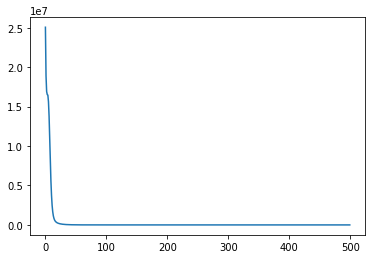

In [12]:
plt.plot(losses)

# PyTorch NN module

In [14]:
import torch 

In [15]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

In [16]:
loss_fn = torch.nn.MSELoss(size_average=False)

In [17]:
losses = []
learning_rate = 1e-4
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t%10 == 0:
        print(t, loss.item())
    losses.append(loss)
    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access and gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 727.7310180664062
10 375.15069580078125
20 212.3015899658203
30 115.91415405273438
40 61.392913818359375
50 32.625335693359375
60 17.84341049194336
70 10.117205619812012
80 5.943233489990234
90 3.5912578105926514
100 2.2122676372528076
110 1.38369619846344
120 0.8763085603713989
130 0.5614712238311768
140 0.3633221387863159
150 0.2373569905757904
160 0.15663215517997742
170 0.10426328331232071
180 0.06997431814670563
190 0.047365397214889526
200 0.03227902576327324
210 0.022131990641355515
220 0.015259256586432457
230 0.010588474571704865
240 0.007388066966086626
250 0.005181081593036652
260 0.0036499928683042526
270 0.0025825463235378265
280 0.00183457275852561
290 0.0013079638592898846
300 0.000935606483835727
310 0.0006713016191497445
320 0.0004830315592698753
330 0.00034846339258365333
340 0.0002519749978091568
350 0.00018260657088831067
360 0.00013258539547678083
370 9.644621604820713e-05
380 7.028022810118273e-05
390 5.129629062139429e-05
400 3.7494595744647086e-05
410 2.744409

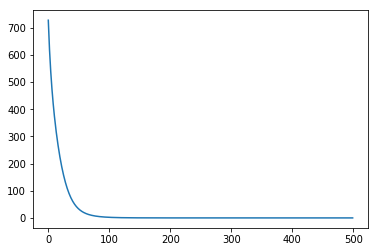

In [18]:
plt.plot(losses)